# Variable Slow Readout Rate

In [1]:
import numpy as np
import json
import pandas as pd

Reading the data.

In [2]:
# Creating an array for each of the files names.
files_list = np.empty((13,), dtype='U64')
for i in range(0, 13):
    files_list[i] = "s01-" + str(i) + ".json"

In [3]:
# Allocating matrices for each of the measures.
hyper_parameters = np.empty((13, 7), dtype='U16')
cka = np.empty((13, 3000), dtype='double')
loss = np.empty((13, 3000), dtype='double')
accuracy = np.empty((13, 3000), dtype='double')

In [4]:
# Loading the data into the matrices.
i = 0
for file in files_list:
    f = open(r"data/" + file, 'r')
    data = json.load(f)

    hyper_parameters[i] = data["Hyper Parameters"]
    cka[i] = data["Centered Kernel Alignment"]
    loss[i] = data["Loss"]
    accuracy[i] = data["Validation Accuracy"]
    i += 1
i = 0

In [5]:
readout_lr = hyper_parameters[:,6]

## Graphing

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
plt.rcParams["figure.figsize"] = (40,20) # Setting plot size.

### Creating Dataframe

In [8]:
df = pd.DataFrame(np.transpose(loss), columns = readout_lr)

In [9]:
df

,0.1,0.075,0.05,0.025,0.01,0.0075,0.005,0.0025,0.001,0.00075,0.0005,0.00025,0.0001
0,0.006716,0.012260,0.015254,0.011303,0.006196,0.014446,0.012016,0.013905,0.020842,0.013177,0.012084,0.016363,0.024502
1,0.006084,0.007611,0.005333,0.012960,0.009195,0.012621,0.009276,0.012679,0.014616,0.006950,0.017405,0.012143,0.021567
2,0.006441,0.004578,0.005737,0.010885,0.009701,0.012449,0.006274,0.009400,0.006261,0.010078,0.009100,0.014190,0.010848
3,0.005544,0.003646,0.006230,0.010201,0.004054,0.005771,0.017002,0.008348,0.006400,0.016740,0.004963,0.013074,0.009405
4,0.005529,0.002992,0.006450,0.003343,0.010379,0.004918,0.004064,0.010861,0.006316,0.010722,0.007990,0.006881,0.006590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000011,0.000004,0.000007,0.000014,0.000032,0.000076,0.000204,0.000165,0.000263,0.000437,0.000401,0.000841,0.001756
2996,0.000008,0.000007,0.000018,0.000032,0.000041,0.000056,0.000086,0.000183,0.000576,0.000401,0.000301,0.000671,0.001078
2997,0.000004,0.000004,0.000007,0.000035,0.000042,0.000063,0.000065,0.000185,0.000363,0.000632,0.000477,0.000725,0.000888
2998,0.000004,0.000009,0.000005,0.000025,0.000117,0.000070,0.000062,0.000115,0.000304,0.000314,0.000550,0.000547,0.000946


### Loss Over Epochs

In [19]:
sns.set_style("whitegrid")

#### Plotting for the last epoch.

In [20]:
loss_epochs = np.zeros((1, 13))
loss_epochs
loss_epochs[0:1] = loss.T[2998:2999]
loss_epochs = pd.DataFrame(loss_epochs, columns = readout_lr)

<AxesSubplot:>

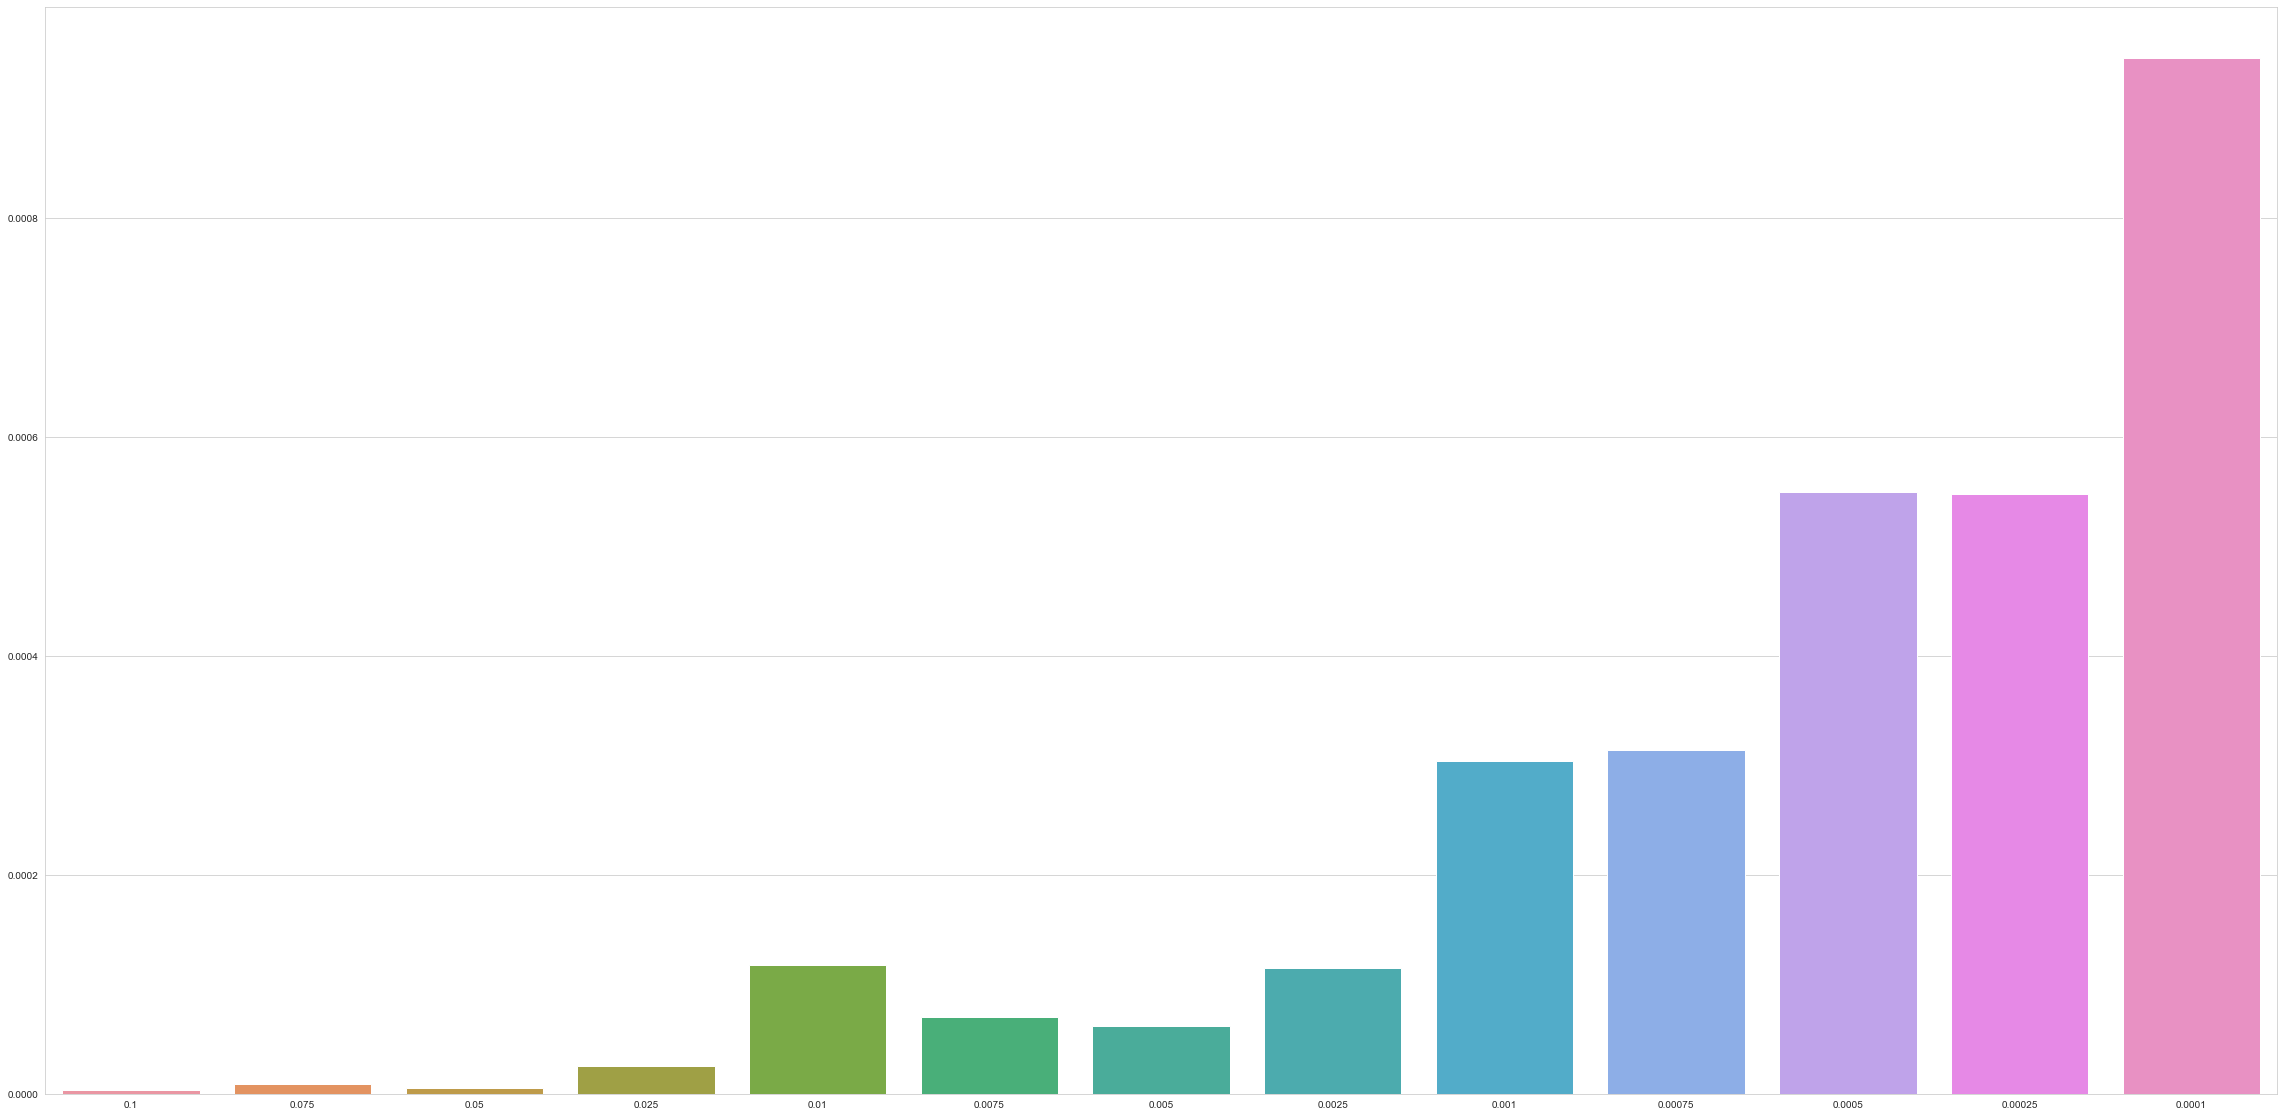

In [21]:
# Plotting for the last epoch
sns.barplot(data = loss_epochs)

#### Plotting for all epochs

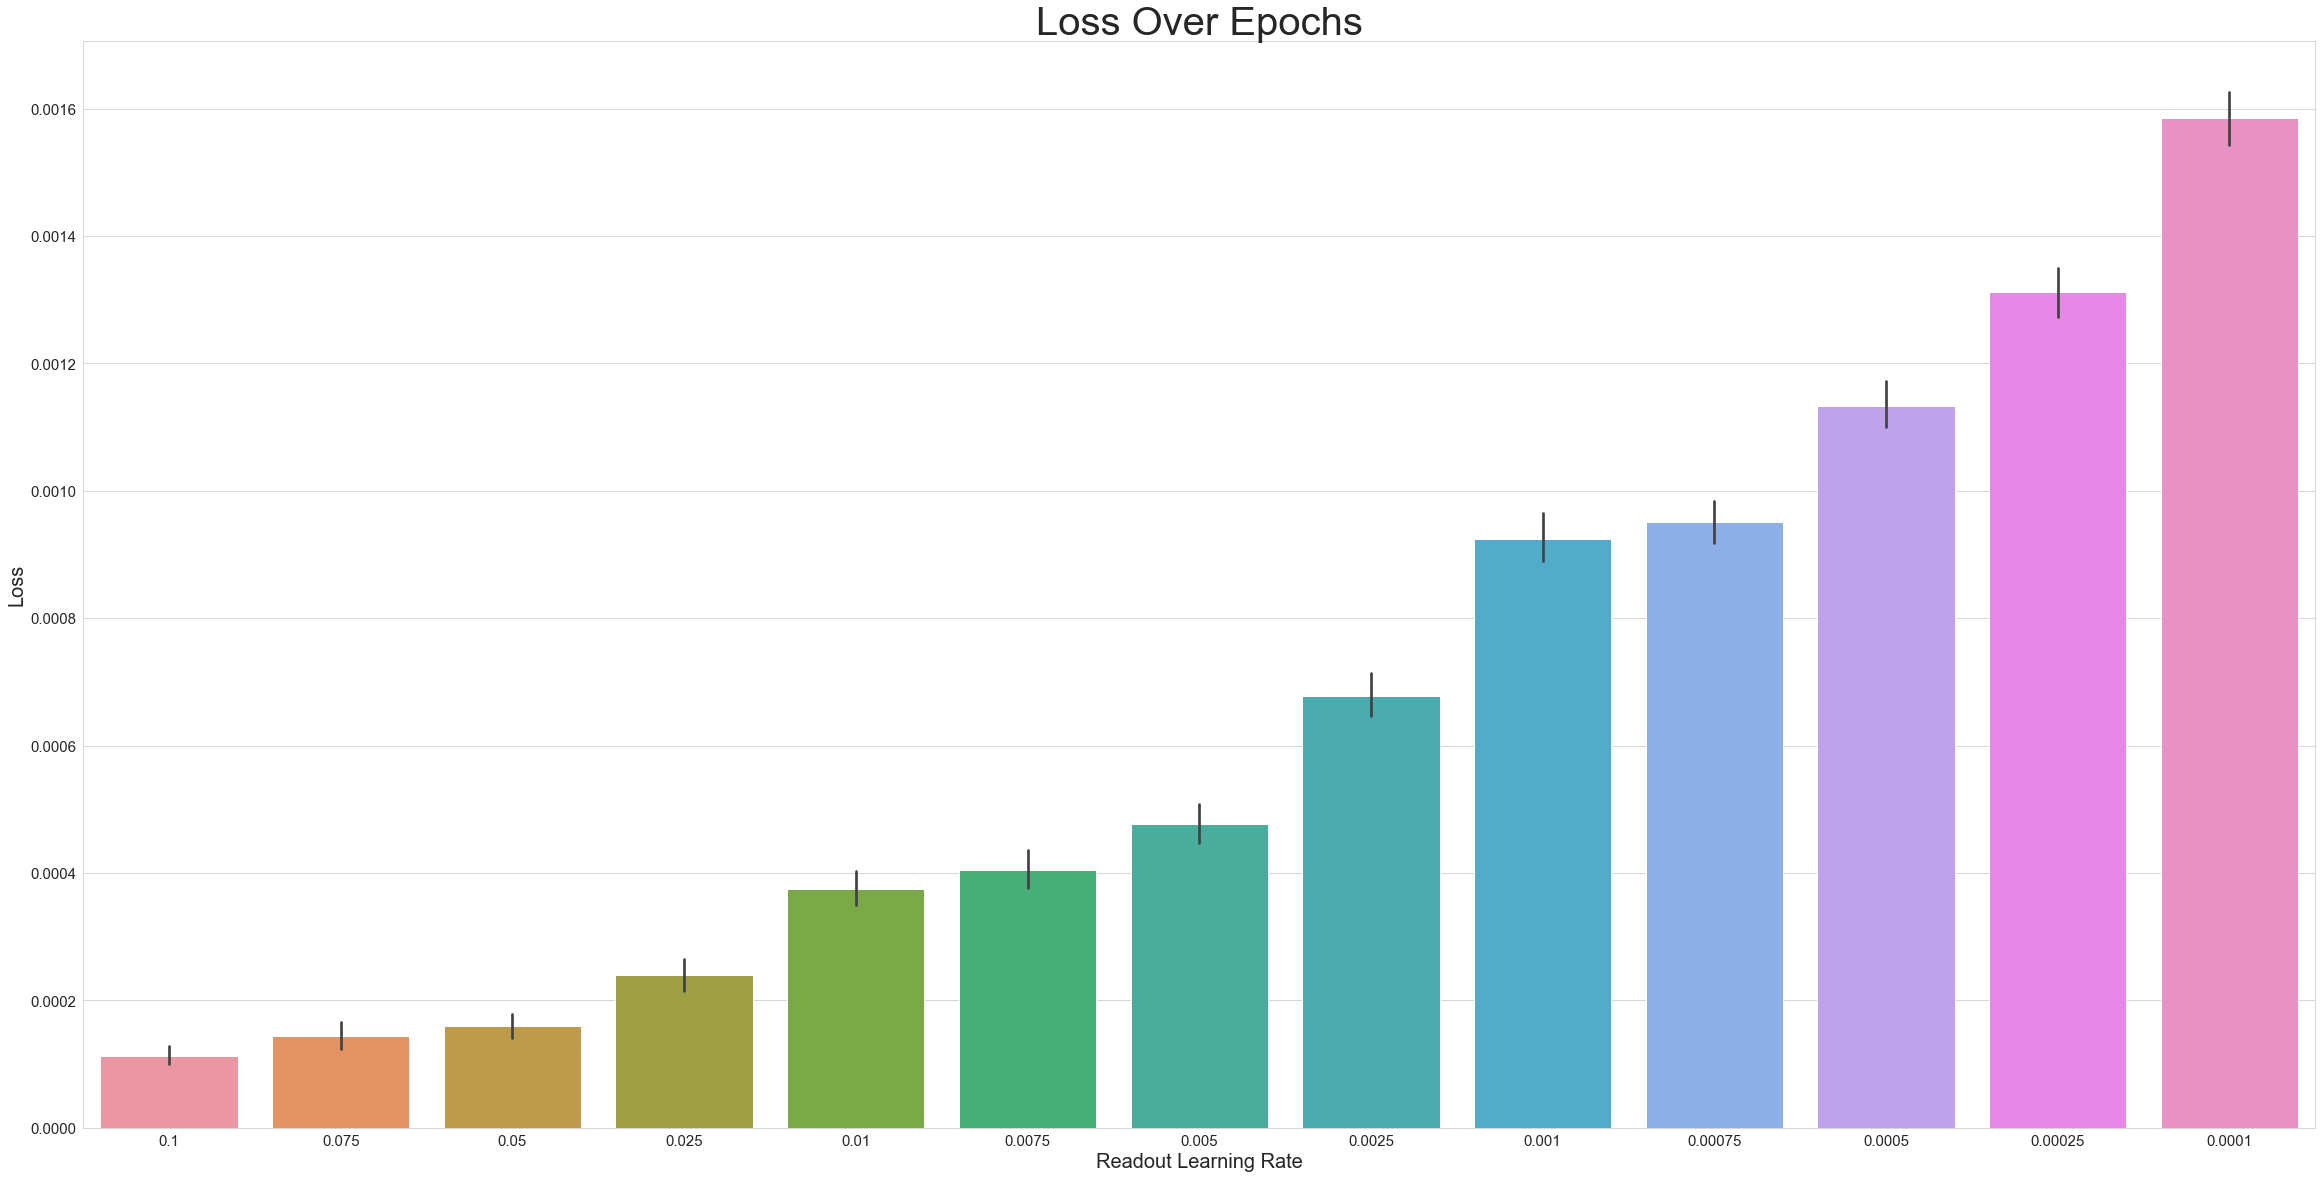

In [33]:
# Plotting loss for each epoch
plot = sns.barplot(data=df)
plot.set_title('Loss', fontdict={'fontsize': 40})
plot.set(xlabel='Readout Learning Rate', ylabel='Loss')
plot.xaxis.label.set_size(20)
plot.xaxis.set_tick_params(labelsize=15)
plot.yaxis.label.set_size(20)
plot.yaxis.set_tick_params(labelsize=15)

### CKA Over Epochs

In [70]:
df = pd.DataFrame(np.transpose(cka), columns = readout_lr)

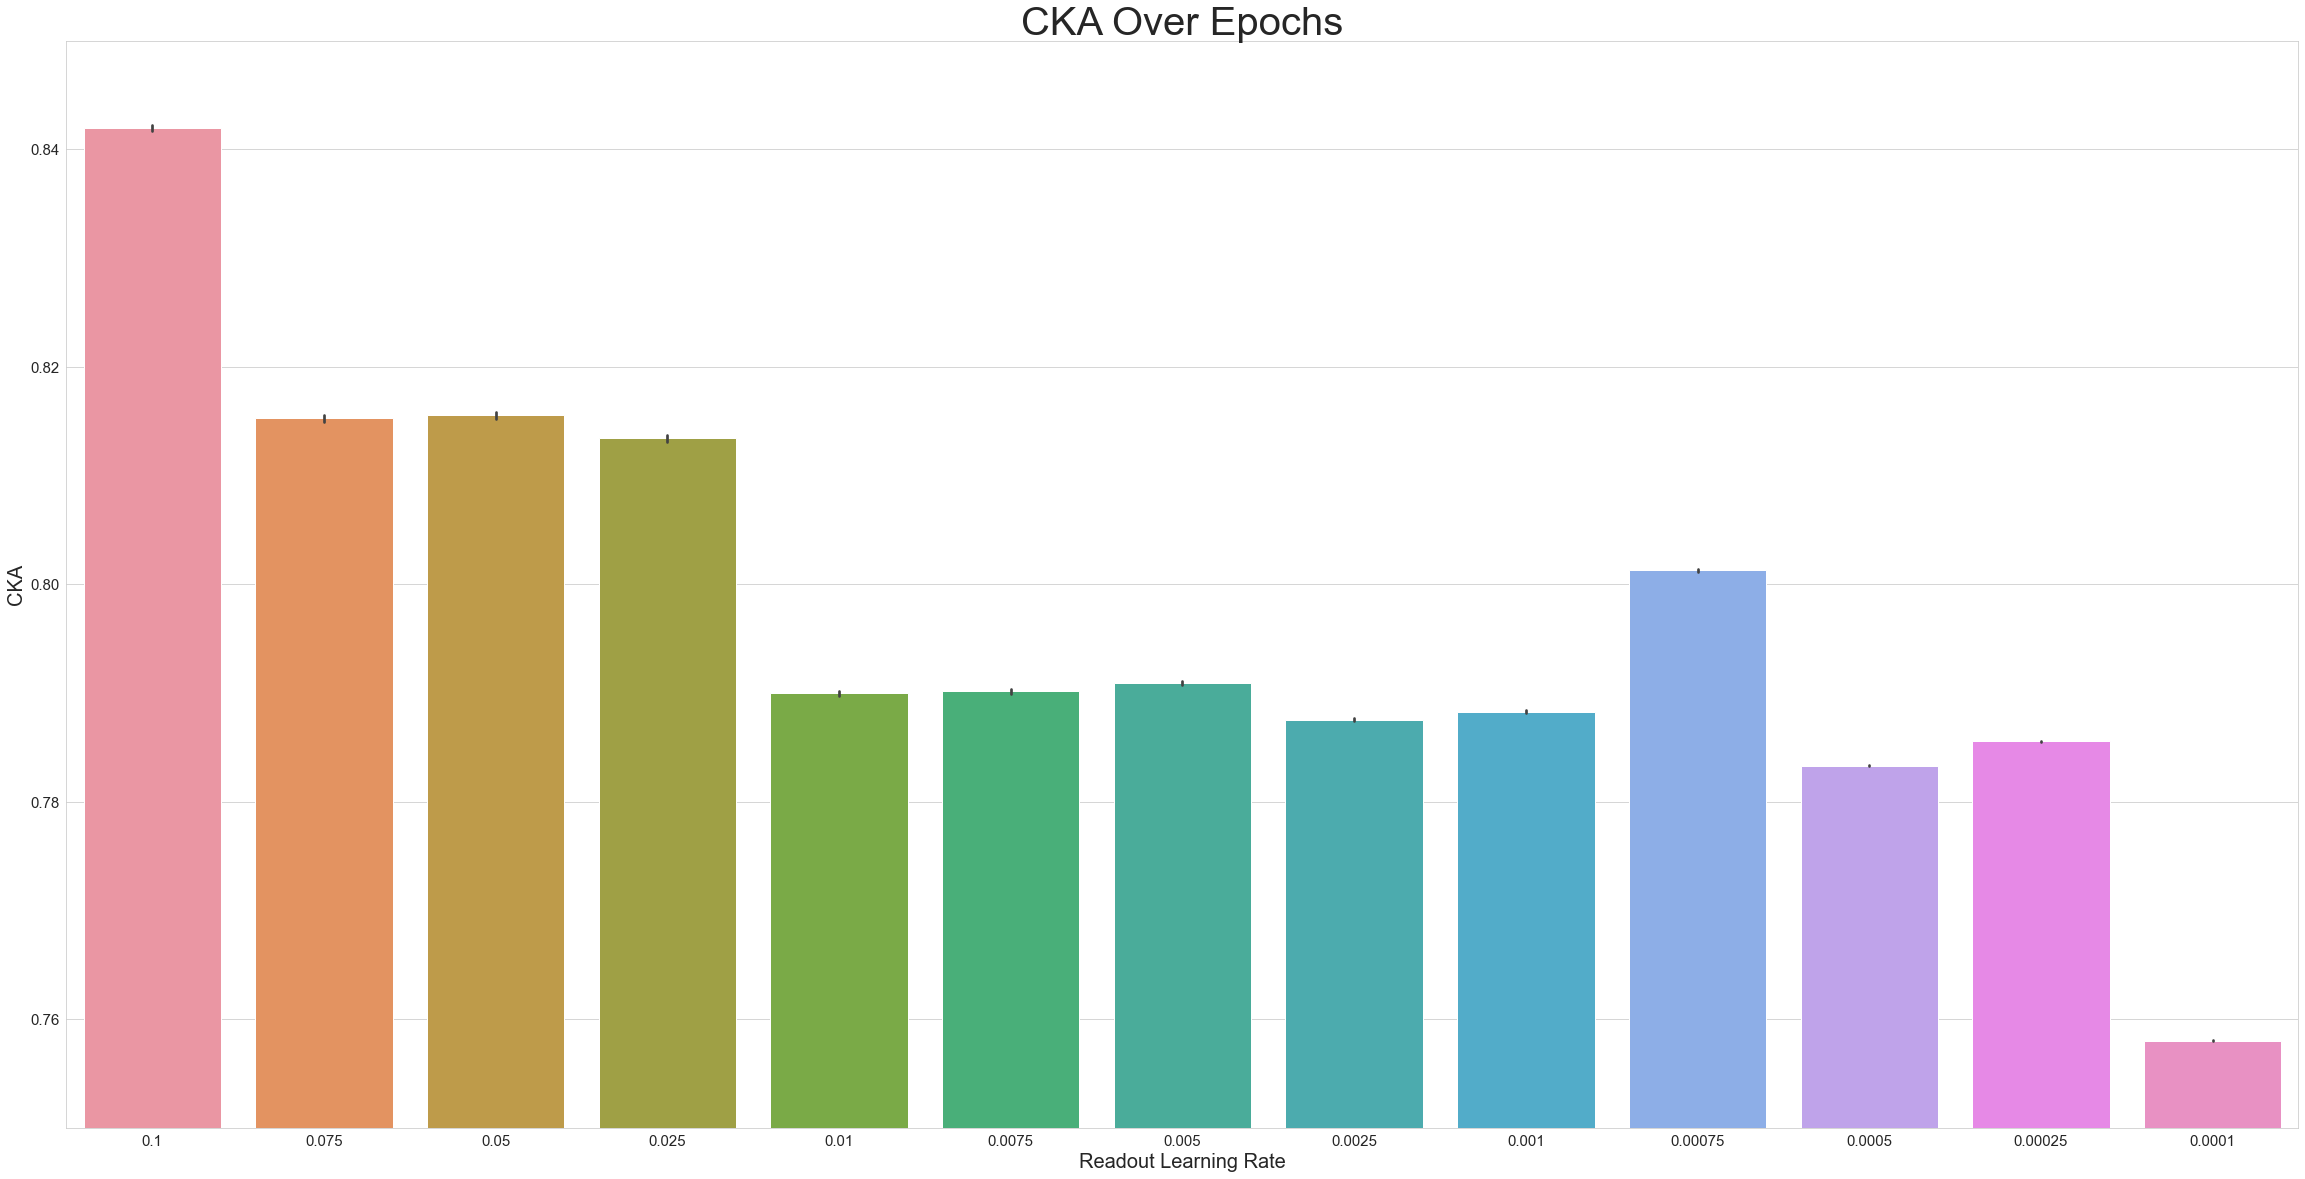

In [71]:
# Plotting loss for each epoch
plot = sns.barplot(data=df)
plot.set_ylim(0.75, 0.85)
plot.set_title('CKA', fontdict={'fontsize': 40})
plot.set(xlabel='Readout Learning Rate', ylabel='CKA')
plot.xaxis.label.set_size(20)
plot.xaxis.set_tick_params(labelsize=15)
plot.yaxis.label.set_size(20)
plot.yaxis.set_tick_params(labelsize=15)

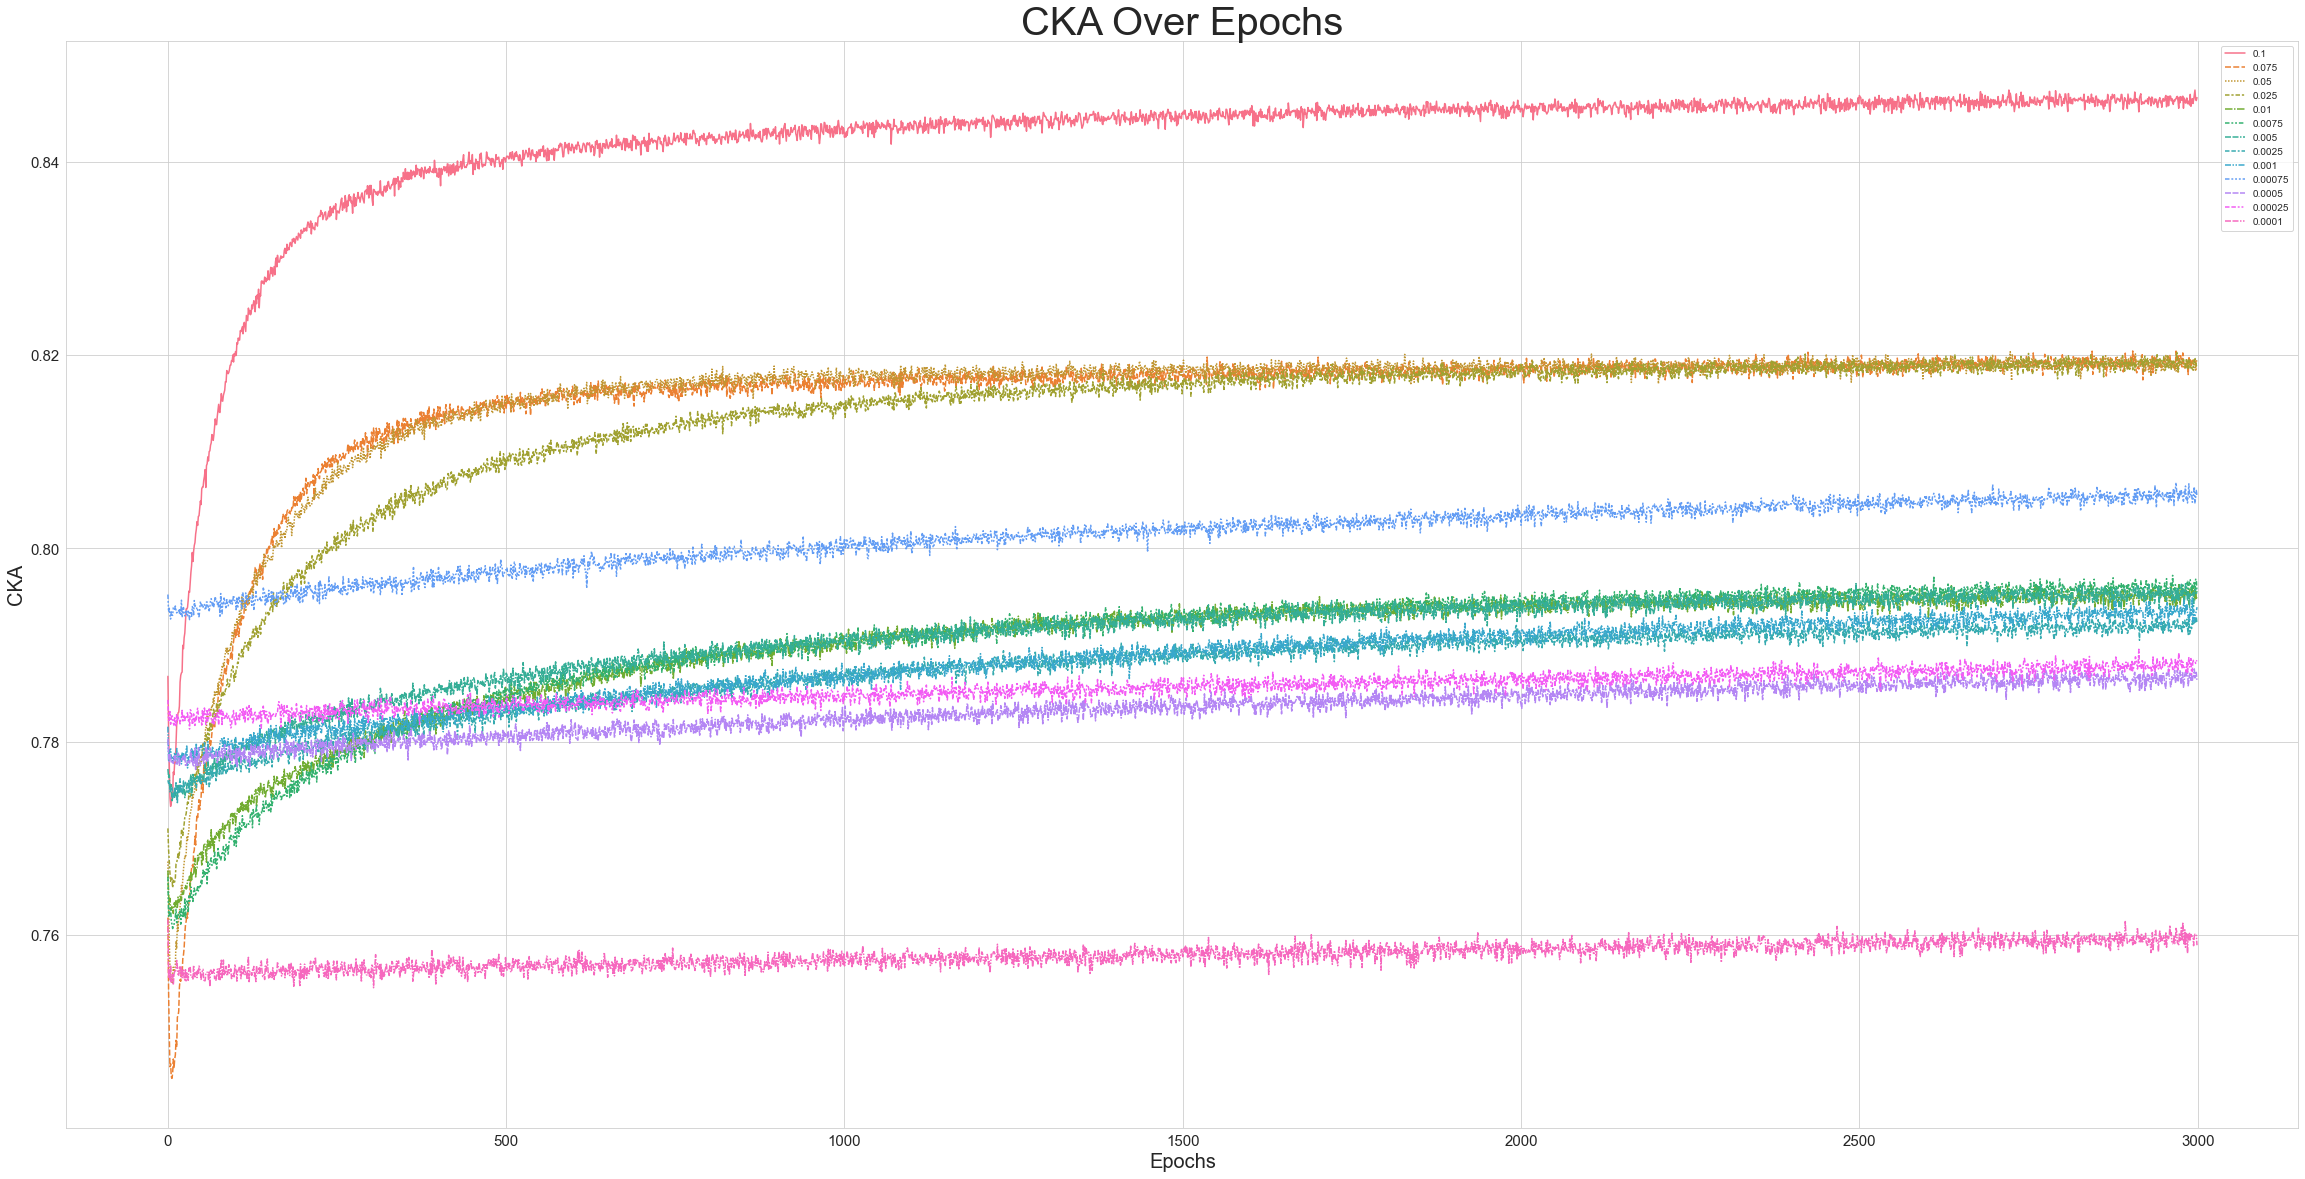

In [73]:
# Plotting loss for each epoch
plot = sns.lineplot(data=df)
plot.set_title('CKA Over Epochs', fontdict={'fontsize': 40})
plot.set(xlabel='Epochs', ylabel='CKA')
plot.xaxis.label.set_size(20)
plot.xaxis.set_tick_params(labelsize=15)
plot.yaxis.label.set_size(20)
plot.yaxis.set_tick_params(labelsize=15)

### Accuracy Over Epochs

In [58]:
df = pd.DataFrame(np.transpose(accuracy), columns = readout_lr)

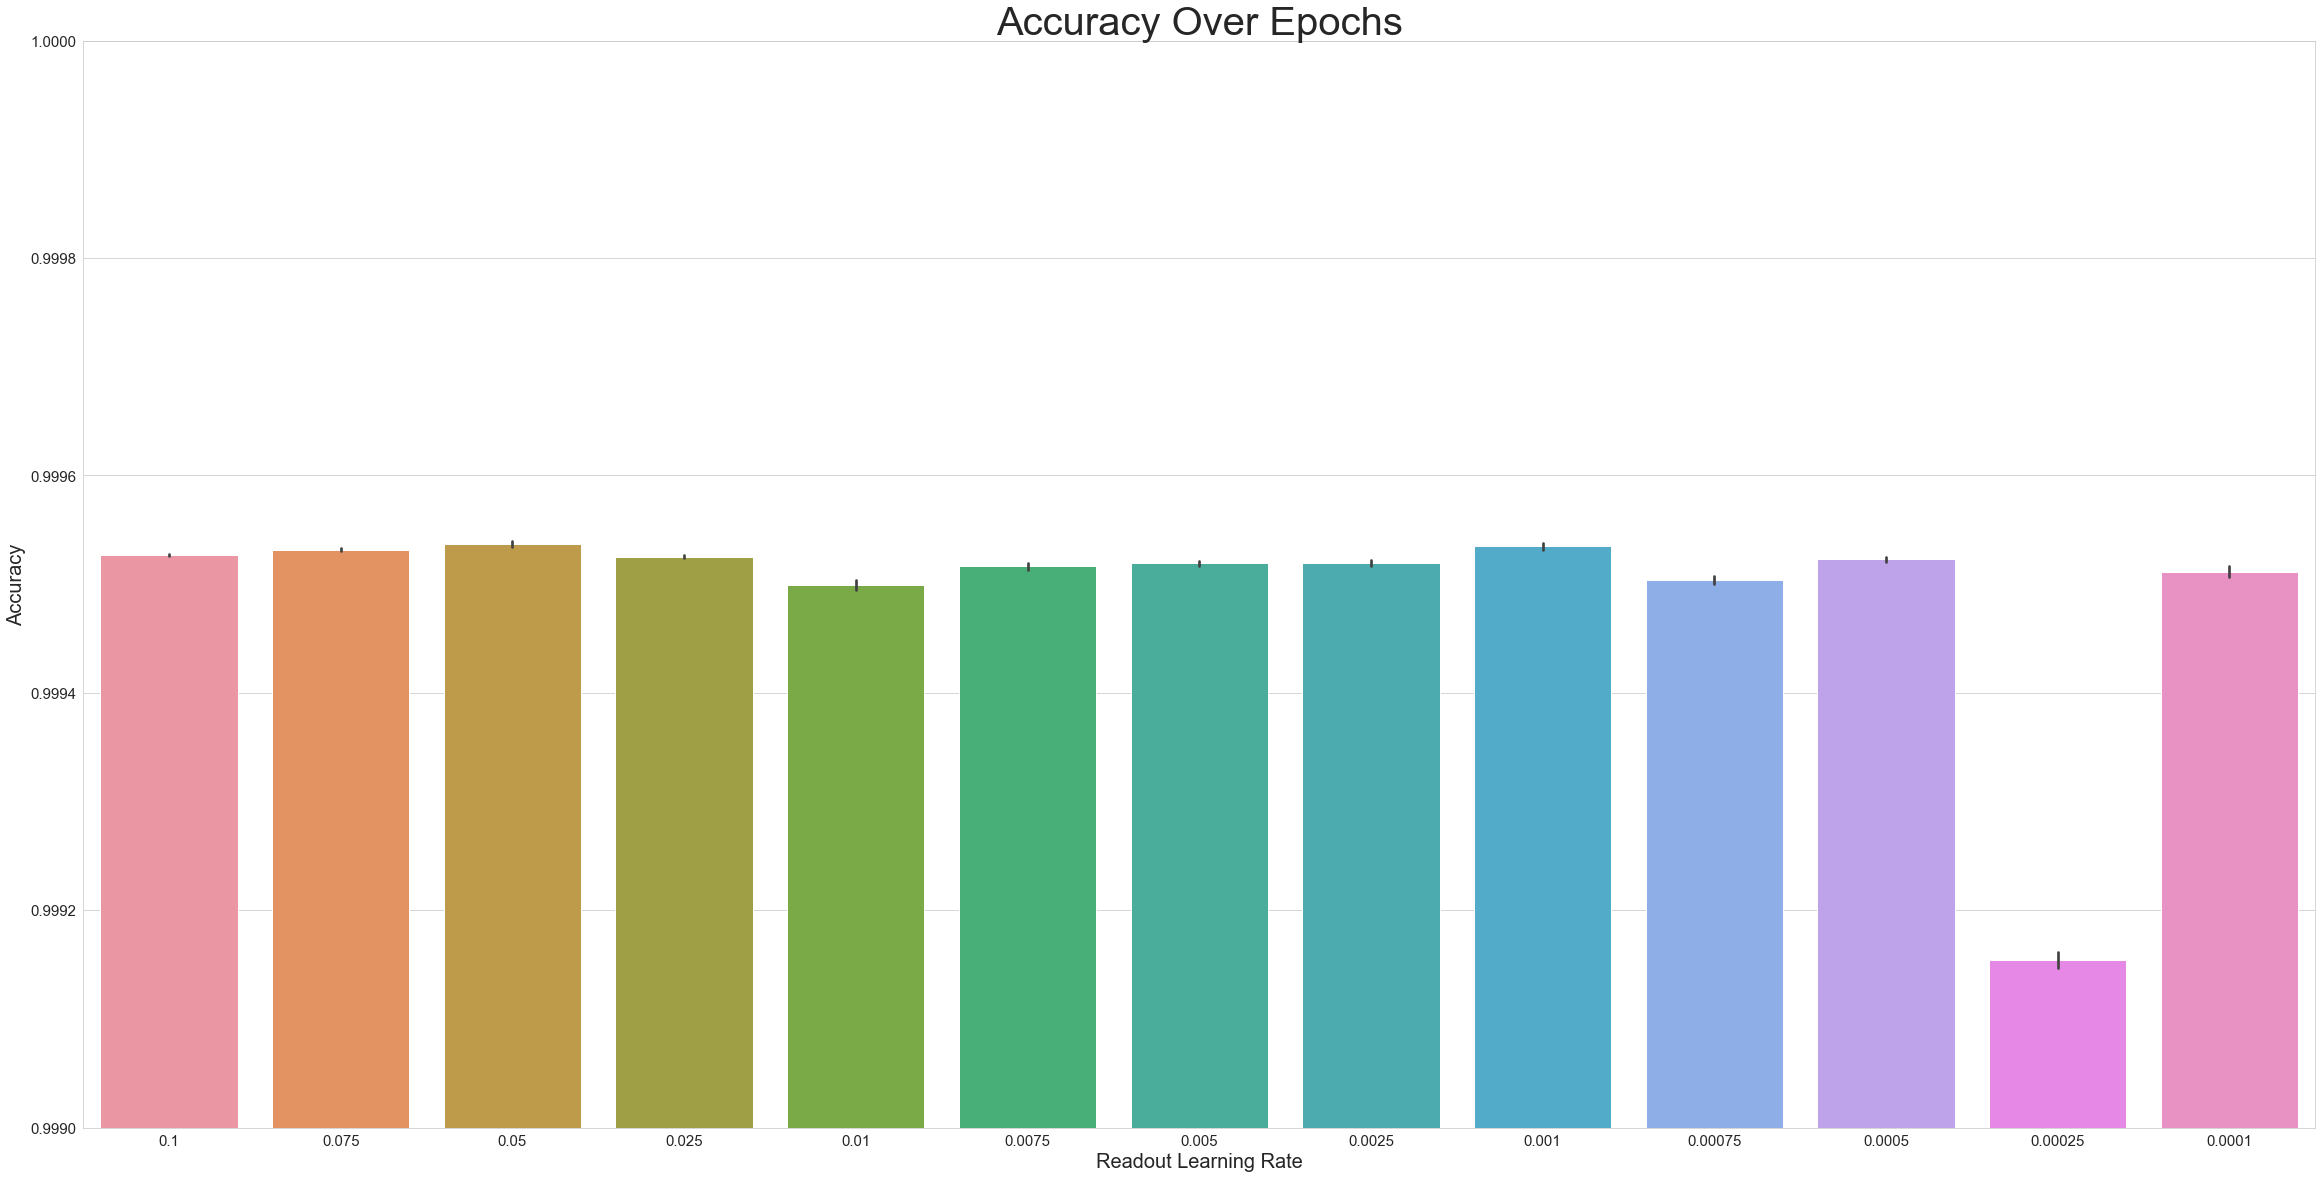

In [67]:
# Plotting loss for each epoch
plot = sns.barplot(data=df)
plot.set_ylim(0.999, 1.0)
plot.set_title('Accuracy', fontdict={'fontsize': 40})
plot.set(xlabel='Readout Learning Rate', ylabel='Accuracy')
plot.xaxis.label.set_size(20)
plot.xaxis.set_tick_params(labelsize=15)
plot.yaxis.label.set_size(20)
plot.yaxis.set_tick_params(labelsize=15)